#### Nome: Thiago Henrique Moireira Santos
#### Matrícula: 2019007074

## Imports

In [412]:
# ConvexHull será usado para testar se minha implementação ConvexHull está correta
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Primitivas Geométricas

In [403]:
# # Método que calcula a posição relativa entre dois pontos
# def direcao(p1, p2, p3):
#     '''
#         Retorna o sinal do cross product dos vetores formados por p1-p2 e p1-p3
#     '''
#     return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

# # Calcula a distância ao quadrado entre os pontos
# def distancia(p1, p2):
#     return (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2


def intersecaoSegmentos(s1, s2):
    '''
        Retorna verdadeiro se os dois segmentos se interceptam.
        Segmentos são representados na forma de tuplas de tuplas.
            ((x1, y1), (x2, y2))
    '''
    d1 = direcao(s1[0], s1[1], s2[0])
    d2 = direcao(s1[0], s1[1], s2[1])
    d3 = direcao(s2[0], s2[1], s1[0])
    d4 = direcao(s2[0], s2[1], s1[1])
    if d1 * d2 < 0 and d3 * d4 < 0:
        return True
        
    elif d1 == 0 and min(s1[0][0], s1[1][0]) <= s2[0][0] <= max(s1[0][0], s1[1][0]) and min(s1[0][1], s1[1][1]) <= s2[0][1] <= max(s1[0][1], s1[1][1]):
        return True
        
    elif d2 == 0 and min(s1[0][0], s1[1][0]) <= s2[1][0] <= max(s1[0][0], s1[1][0]) and min(s1[0][1], s[11]) <= s[21]<= max(s[10], s[11]):
        return True
    
    elif d3 == 0 and min(s2[0][0], s2[11]) <= s[10] <= max(s[20], s[21]) and min(s[20], s[21]) <= s[11]<= max(s[20], s[21]):
        return True
    
    elif d4 == 0 and min(s2[00], s[21]) <= s[11] <= max(s[20], s[21]) and min(s[20], s[21]) <= s[11] <= max(s[20], s[21]):
        return True
    
    else:
        return False

In [365]:
# Alguns testes para as primitivas
p1 = (0,0)
p2 = (3,0)
p3 = (1,3)
p4 = (1,5)

print(intersecaoSegmentos((p1, p2), (p1, p3)))
print(intersecaoSegmentos((p1, p2), (p3, p4)))

True
False


## Métodos Auxiliares

In [411]:
def scatter_plot(coords,convex_hull=None):
    xs, ys = zip(*coords,)
    plt.scatter(xs, ys)

    if convex_hull != None:
        for i in range (1, len(convex_hull)+1):
            if i == len(convex_hull): i = 0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()

# Produto vetorial entre dois pontos
def cross_product(p1, p2):
    return p1[0] * p2[1] - p1[1] * p2[0]

# Método para encontrar o ponto âncora na 
def findAcnhor(points):
    anchor = points[0]

      # Ponto com menor coordenada x e menor coordenada y
    for i in range(0, len(points)):
        if ((points[i][1] < anchor[1]) or (points[i][1] == anchor[1] and points[i][0] < anchor[0])):
            anchor = points[i]
            index = i
    return anchor 

# Função para comparar dois pontos pelo ângulo polar em relação a um ponto de referência
def compara(p1, p2):
    d = direcao(anchor, p1, p2)
    if d==0:
        if (distancia(anchor, p1) <= distancia(anchor, p2)):
            return 1
        else:
            return -1
    else:
        if d>0:
            return 1
        else:
            return -1

def generate_linearly_separable_points(n, m):
  '''
      Generates two sets of linearly separable points in a square with side length 100.
        Gera dois conjuntos linearmente separáveis com coords dentro do intervalo [0, 100]
      
      Args:
        n: Número de pontos no primeiro conjunto.
        m: Número de pontos no segundo conjunto.
  '''

  # Escolha um ponto qualquer como o ponto de referência.
  reference_point = (random.uniform(0, 100), random.uniform(0, 100))

  # Cria dois conjuntos de pontos vazios.
  points1 = []
  points2 = []

  # Para cada ponto no primeiro conjunto, verifique se o ponto está do mesmo lado do ponto de referência que o ponto mais distante do ponto de referência no segundo conjunto.
  for point in range(n):
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)

    # Calcula o produto vetorial entre o ponto de referência e o ponto.
    cross_product = (reference_point[0] - x) * (reference_point[1] - y)

    # Se o produto vetorial for positivo, o ponto está do mesmo lado do ponto de referência que o ponto mais distante do ponto de referência no segundo conjunto.
    if cross_product > 0:
      points2.append((x, y))
    else:
      points1.append((x, y))

  return points1, points2

## Conjunto de pontos usado para desenvolvimento

Estes dois conjuntos foram gerados utilizando a biblioteca de geração de números aleatórios do Numpy ( https://numpy.org/doc/stable/reference/random/generator.html )

In [367]:
pontos = [[0.22688949, 0.24343388],
       [0.67727389, 0.93778218],
       [0.16187889, 0.0871253 ],
       [0.58984928, 0.03058331],
       [0.38976821, 0.77255991],
       [0.55006227, 0.6502655 ],
       [0.09104538, 0.43095735],
       [0.29435282, 0.2270053 ],
       [0.12145934, 0.81931098],
       [0.15332234, 0.24762428],
       [0.11374118, 0.29527192],
       [0.52699039, 0.3824048 ],
       [0.57357704, 0.3869051 ],
       [0.88246149, 0.99901381],
       [0.73670403, 0.59667429],
       [0.25657022, 0.20150738],
       [0.06542711, 0.50015123],
       [0.97753058, 0.24244226],
       [0.95022235, 0.04687435],
       [0.15773529, 0.94463369],
       [0.72967653, 0.47814532],
       [0.3053088 , 0.24342219],
       [0.81815759, 0.07870696],
       [0.90724394, 0.91664122],
       [0.96367738, 0.03285879],
       [0.89858141, 0.4375507 ],
       [0.11452501, 0.18145962],
       [0.52919786, 0.92133511],
       [0.81945931, 0.25545877],
       [0.45421507, 0.68889127]]

In [368]:
pontos2 = [[0.7410842,  0.78191236],
 [0.84390475, 0.33168499],
 [0.70635126, 0.08835168],
 [0.67924467, 0.63662898],
 [0.41037585, 0.73205173],
 [0.68841872, 0.13267472],
 [0.72303464, 0.32740132],
 [0.23980089, 0.71377673],
 [0.35227052, 0.70189628],
 [0.63266119, 0.43650198],
 [0.8391399,  0.23355931],
 [0.34933823, 0.01512277],
 [0.35890664, 0.5577776 ],
 [0.3884205,  0.99798723],
 [0.81050503, 0.98322865],
 [0.25380914, 0.29042159],
 [0.73314733, 0.01166414],
 [0.65047954, 0.15743713],
 [0.04242211, 0.87198078],
 [0.57105585, 0.50322786],
 [0.86281375, 0.88832513],
 [0.18500193, 0.13823983],
 [0.4174539,  0.1675967 ],
 [0.82490925, 0.79377457],
 [0.6048473,  0.23342215],
 [0.36826778, 0.33399363],
 [0.52937346, 0.708423  ],
 [0.05475651, 0.17621432],
 [0.05951312, 0.54846091],
 [0.56286141, 0.64304644]]

## Primeira Tentativa: Varredura de Graham

In [369]:
def graham(points):
    global anchor
    anchor = findAcnhor(points)
    
    sorted_points = sorted(points, key=cmp_to_key(compara))

    stack = []
    stack.append(sorted_points[0])
    stack.append(sorted_points[1])
    stack.append(sorted_points[2])

    for i in range(3, len(sorted_points)):
        while (direcao(stack[-2], stack[-1], sorted_points[i]) > 0):
            stack.pop()
        stack.append(sorted_points[i])

    return stack

Infelizmente essa abordagem que tentei está com algum problema que não conseguir descobrir. Inclusive, eu quase não percebi o problema porque é bem sutil. Foi apenas quando eu rodei o algoritmo para o seguinte conjunto de pontos que percebi que tinha alguma coisa errada acontecendo e foi aí que comecei a investigar (até esse momento, estava funcionando corretamente para os outros testes que eu havia feito)

In [370]:
envoltoria_teste = graham(pontos2)

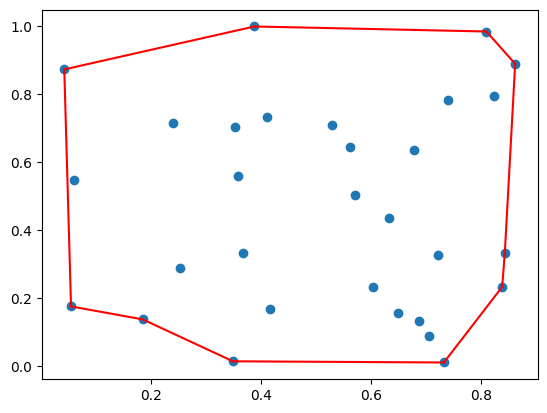

In [371]:
scatter_plot(pontos2, envoltoria_teste)

Visilmente um dos pontos na parte inferior esquerda não deveria fazer parte da envoltória convexa... 

## Segunda Tentativa: Gift Wrapping

In [401]:
def orientation(p, q, r):
    '''
        Retorna a orientação de 3 pontos
    '''
    val = (q[1] - p[1]) * (r[0] - q[0]) - \
        (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2


def distance(p, q):
    '''
        Retorna a distância entre dois pontos
    '''
    return (q[1] - p[1])**2 + (q[0] - p[0])**2

def gift_wrapping(points):
    '''
        Retorna a envoltória convexa de um conjunto de pontos
    '''
    # Encontra o ponto mais a esquerda
    leftmost = min(points, key=lambda x: x[0])
    hull = [leftmost]
    current = leftmost
    while True:
        next = points[0]
        for p in points:
            if p == current:
                continue
            turn = orientation(current, next, p)
            if turn == 1 or (turn == 0 and distance(current, p) > distance(current, next)):
                next = p
        if next == leftmost:
            break
        hull.append(next)
        current = next
    return hull


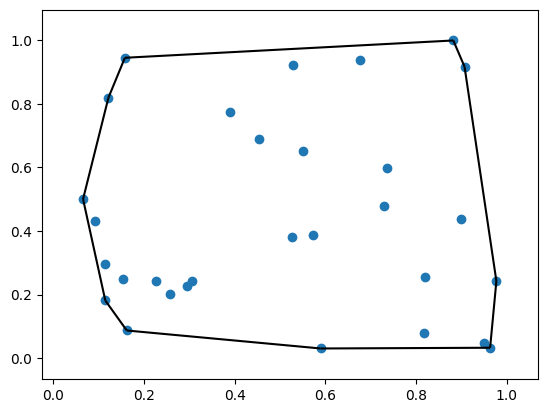

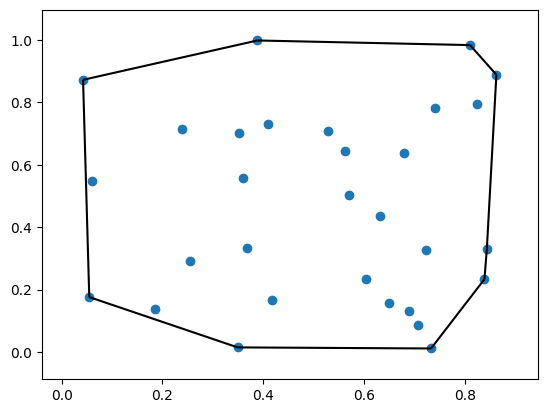

In [376]:
# Usando método do Numpy
convex_hull_plot_2d(ConvexHull(pontos))
convex_hull_plot_2d(ConvexHull(pontos2))
plt.show()

In [381]:
# Usando minha implementação do embrulho para presente.
envoltoria_teste1 = gift_wrapping(pontos)
envoltoria_teste2 = gift_wrapping(pontos2)

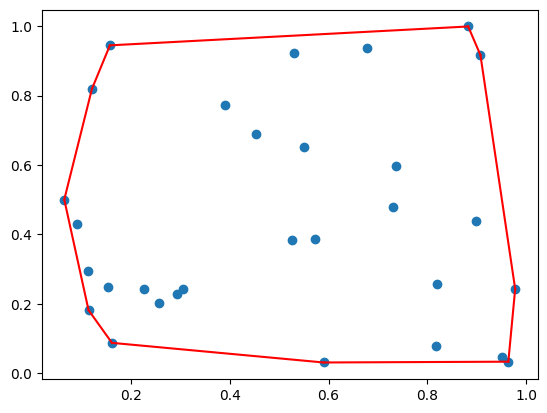

In [378]:
scatter_plot(pontos, envoltoria_teste1)

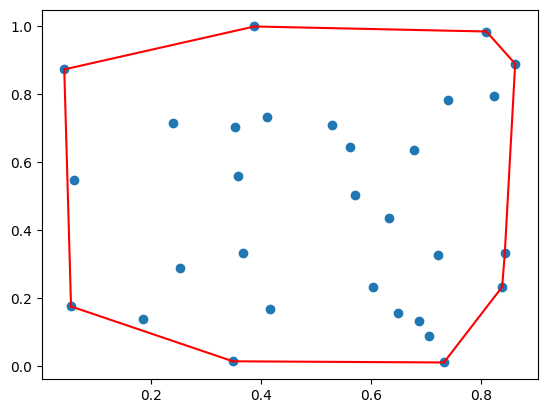

In [380]:
scatter_plot(pontos2, envoltoria_teste2)

In [383]:
# Numericamente
# Resultado usando a biblioteca numpy
hull = ConvexHull(np.array(pontos))
hull_points = np.array(pontos)[hull.vertices]
print(hull_points)

print("\n\n")

hull2 = ConvexHull(np.array(pontos2))
hull_points2 = np.array(pontos2)[hull2.vertices]
print(hull_points2)

[[0.88246149 0.99901381]
 [0.15773529 0.94463369]
 [0.12145934 0.81931098]
 [0.06542711 0.50015123]
 [0.11452501 0.18145962]
 [0.16187889 0.0871253 ]
 [0.58984928 0.03058331]
 [0.96367738 0.03285879]
 [0.97753058 0.24244226]
 [0.90724394 0.91664122]]



[[0.04242211 0.87198078]
 [0.05475651 0.17621432]
 [0.34933823 0.01512277]
 [0.73314733 0.01166414]
 [0.8391399  0.23355931]
 [0.84390475 0.33168499]
 [0.86281375 0.88832513]
 [0.81050503 0.98322865]
 [0.3884205  0.99798723]]


In [384]:
# Resultado usando o embrulho para presente
print(envoltoria_teste1)
print("\n\n")
print(envoltoria_teste2)

[[0.06542711, 0.50015123], [0.11452501, 0.18145962], [0.16187889, 0.0871253], [0.58984928, 0.03058331], [0.96367738, 0.03285879], [0.97753058, 0.24244226], [0.90724394, 0.91664122], [0.88246149, 0.99901381], [0.15773529, 0.94463369], [0.12145934, 0.81931098]]



[[0.04242211, 0.87198078], [0.05475651, 0.17621432], [0.34933823, 0.01512277], [0.73314733, 0.01166414], [0.8391399, 0.23355931], [0.84390475, 0.33168499], [0.86281375, 0.88832513], [0.81050503, 0.98322865], [0.3884205, 0.99798723]]


Fiz alguns plots para ilustrar alguns cenários que pode

## Varredura Linear para verificação de separabilidade

Tendo um meio para construir as envoltórias para os conjuntos de pontos, o próximo passo agora é conseguir verificar se dois conjuntos são linearmente separáveis ou não sob a ótica do modelo que queremos criar (encontrando as envoltórias dos conjuntos).

Para isso, primeiro temos que gerar o segmento de reta que une as duas envoltórias, ese segmento deve ser gerado a partir dos pontos mais próximos entre as duas envoltórias. Depois 

In [404]:
# A primeira coisa a se fazer é verificar se há intersecção entre os segmentos
#que formam as duas envoltórias
envoltoria1 = gift_wrapping(pontos)
envoltoria2 = gift_wrapping(pontos2)

In [405]:
# Método para verificar se a intersecção ocorre sobre o segmento.
def onSegment(p0, p1, p2):
    if (min(p0[0], p1[0]) <= p2[0] <= max(p0[0], p1[0]) and
            min(p0[1], p1[1]) <= p2[1] <= max(p0[1], p1[1])):
        return True
    else:
        return False

def intersecao(p1, p2, p3, p4):
    d1 = direcao(p3, p4, p1)
    d2 = direcao(p3, p4, p2)
    d3 = direcao(p1, p2, p3)
    d4 = direcao(p1, p2, p4)

    if (((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and
            ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0))):
        return True
    elif (d1 == 0 and onSegment(p3, p4, p1)):
        return True
    elif (d2 == 0 and onSegment(p3, p4, p2)):
        return True
    elif (d3 == 0 and onSegment(p1, p2, p3)):
        return True
    elif (d4 == 0 and onSegment(p1, p2, p4)):
        return True
    else:
        return False


# Transformando o retorno da envoltória em um conjunto de segmentos
def envoltoriaParaSegmentos(envoltoria):
    segmentos = []
    for i in range(0, len(envoltoria) - 1):
        segmentos.append((envoltoria[i], envoltoria[i + 1]))
    segmentos.append((envoltoria[-1], envoltoria[0]))
    return segmentos

# Verifica se há intersecção entre os segmentos da envoltória
def verificaIntersecao(envoltoria1, envoltoria2):
    segmentos1 = envoltoriaParaSegmentos(envoltoria1)
    segmentos2 = envoltoriaParaSegmentos(envoltoria2)

    for s1 in segmentos1:
        for s2 in segmentos2:
            if intersecao(s1[0], s1[1], s2[0], s2[1]):
                return True
    return False

# # Verifica se há intersecção entre as duas envoltórias
# def verificaIntersecaoEnvoltorias(envoltoria1, envoltoria2):
#     if verificaIntersecao(envoltoria1, envoltoria2):
#         return True
#     else:
#         return False

In [408]:
# Fazendo o teste
verificaIntersecao(envoltoria1, envoltoria2)

True

#### Visualização para facilitar a percepção do caso

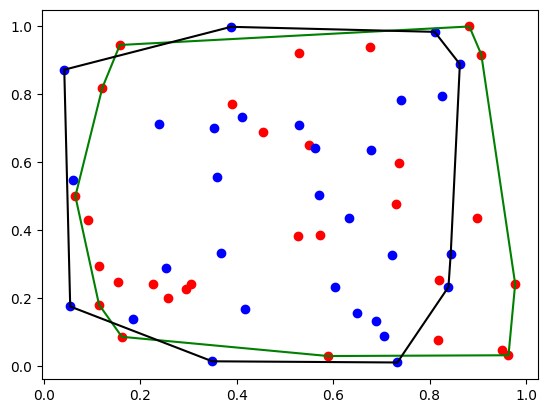

In [409]:
plt.scatter(np.array(pontos)[:,0], np.array(pontos)[:,1], color='red')
plt.scatter(np.array(pontos2)[:,0], np.array(pontos2)[:,1], color='blue')

# Plotando as envoltórias
plt.plot(np.array(envoltoria1)[:,0], np.array(envoltoria1)[:,1], color='green')
plt.plot(np.array(envoltoria2)[:,0], np.array(envoltoria2)[:,1], color='black')

# Adicionando segmento faltante que liga o último ponto da envoltória 1 com o primeiro
# ponto da envoltoria 1
plt.plot([envoltoria1[-1][0], envoltoria1[0][0]], [envoltoria1[-1][1], envoltoria1[0][1]], color='green')

# Adicionando segmento faltante que liga o último ponto da envoltória 2 com o primeiro
# ponto da envoltoria 2
plt.plot([envoltoria2[-1][0], envoltoria2[0][0]], [envoltoria2[-1][1], envoltoria2[0][1]], color='black')


plt.show()



In [422]:
#pontos3, pontos4 = generate_linearly_separable_points(10, 10)
# Os conjuntos de pontos foram gerados com a chamada do método acima
pontos3 = [(93.24003540996011, 14.118986536099264), (48.36461512646911, 56.41437680939069), (68.89726273720055, 15.18413333593388), (48.280779177573166, 7.621790839785037), (68.87194834873037, 28.056666713462242), (32.477819054324456, 77.03746165266527)]
pontos4 = [(0.6220952757936438, 26.38715775733711), (26.340849875946148, 22.97124723755909), (14.499275086539642, 54.87414134132648), (14.189457546882188, 16.667536133701567)]
print(pontos3)
print(pontos4)

[(93.24003540996011, 14.118986536099264), (48.36461512646911, 56.41437680939069), (68.89726273720055, 15.18413333593388), (48.280779177573166, 7.621790839785037), (68.87194834873037, 28.056666713462242), (32.477819054324456, 77.03746165266527)]
[(0.6220952757936438, 26.38715775733711), (26.340849875946148, 22.97124723755909), (14.499275086539642, 54.87414134132648), (14.189457546882188, 16.667536133701567)]


In [423]:
# Gerando mais duas envoltórias (para fins de teste) desta vez com um conjuntos criados para serem separáveis
envoltoria3 = gift_wrapping(pontos3)
envoltoria4 = gift_wrapping(pontos4)

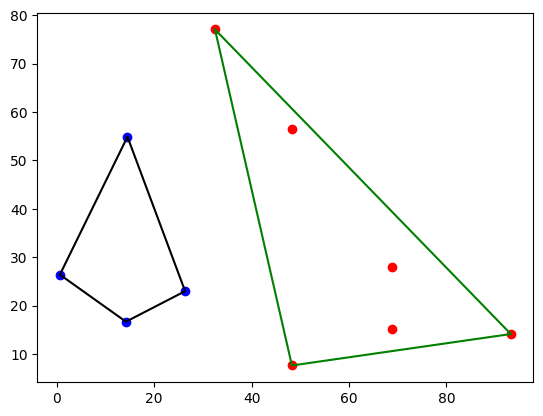

In [424]:
plt.scatter(np.array(pontos3)[:,0], np.array(pontos3)[:,1], color='red')
plt.scatter(np.array(pontos4)[:,0], np.array(pontos4)[:,1], color='blue')

# Plotando as envoltórias
plt.plot(np.array(envoltoria3)[:,0], np.array(envoltoria3)[:,1], color='green')
plt.plot(np.array(envoltoria4)[:,0], np.array(envoltoria4)[:,1], color='black')

# Adicionando segmento faltante que liga o último ponto da envoltória 1 com o primeiro
# ponto da envoltoria 1
plt.plot([envoltoria3[-1][0], envoltoria3[0][0]], [envoltoria3[-1][1], envoltoria3[0][1]], color='green')

# Adicionando segmento faltante que liga o último ponto da envoltória 2 com o primeiro
# ponto da envoltoria 2
plt.plot([envoltoria4[-1][0], envoltoria4[0][0]], [envoltoria4[-1][1], envoltoria4[0][1]], color='black')


plt.show()



In [425]:
# Fazendo o teste
verificaIntersecao(envoltoria3, envoltoria4)

False

## Construção do Modelo de Classificação

Mais um passo concluído, agora é possível determinar se dois conjuntos de dados são separáveis, o que nos permite avançar no processo
de construção do modelo. A próxima coisa a ser feita é gerar o segmento de reta que une as duas envoltórias, esse segmento deve ser formado pelos pontos mais próximos entre elas e depois disso, para gerar o modelo, temos que traçar uma reta que é perpendicular a esse segmento.

In [504]:
# Para criar a reta perpendicular, vamos criar uma função que recebe dois pontos e retorna
# a reta perpendicular que passa pelo ponto médio do segmento de reta que liga os dois pontos
mid_x = 0

def perpendicular(p1, p2):
    '''
        Retorna a reta perpendicular ao segmento de reta que liga os pontos p1 e p2
    '''
    # Encontra o ponto médio do segmento de reta que liga os pontos p1 e p2
    x = (p1[0] + p2[0]) / 2
    y = (p1[1] + p2[1]) / 2
    mid_x = x

    # Coeficiente angular da reta que liga os pontos p1 e p2
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])

    # Ceficiente angular da reta perpendicular
    m_perpendicular = -1 / m

    # 'b' da Eq da reta
    b = y - m_perpendicular * x

    # Por fim, vamos retornar a reta perpendicular
    return (m_perpendicular, b) 


# Agora, vamos criar uma função que recebe duas envoltórias e retorna a reta que separa
# os dois conjuntos de pontos

def separating_line(hull1, hull2):
    '''
        Retorna a reta que separa os dois conjuntos de pontos
    '''
    # Primeiro, vamos encontrar os pontos mais próximos das duas envoltórias
    p1 = hull1[0]
    p2 = hull2[0]
    for i in range(len(hull1)):
        for j in range(len(hull2)):
            if distance(hull1[i], hull2[j]) < distance(p1, p2):
                p1 = hull1[i]
                p2 = hull2[j]

    # Agora, vamos encontrar a reta perpendicular ao segmento de reta que liga os pontos p1 e p2
    m, b = perpendicular(p1, p2)

    # Por fim, vamos retornar a reta que separa os dois conjuntos de pontos
    return (m, b)





In [431]:
# Pontos mais próximos entre as duas envoltórias (retorno: coeficientes da equação da reta)
separating_line(envoltoria3, envoltoria4)

(1.4293619743308108, -38.03414047718782)

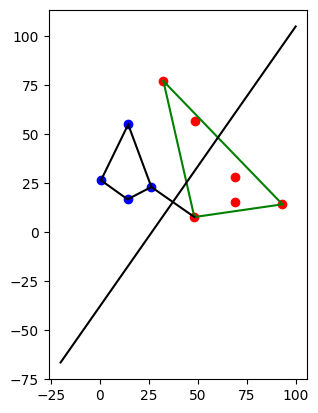

In [437]:
fig, ax = plt.subplots()

plt.scatter(np.array(pontos3)[:,0], np.array(pontos3)[:,1], color='red')
plt.scatter(np.array(pontos4)[:,0], np.array(pontos4)[:,1], color='blue')

# Plotando as envoltórias
plt.plot(np.array(envoltoria3)[:,0], np.array(envoltoria3)[:,1], color='green')
plt.plot(np.array(envoltoria4)[:,0], np.array(envoltoria4)[:,1], color='black')

# Adicionando segmento faltante que liga o último ponto da envoltória 1 com o primeiro
# ponto da envoltoria 1
plt.plot([envoltoria3[-1][0], envoltoria3[0][0]], [envoltoria3[-1][1], envoltoria3[0][1]], color='green')

# Adicionando segmento faltante que liga o último ponto da envoltória 2 com o primeiro
# ponto da envoltoria 2
plt.plot([envoltoria4[-1][0], envoltoria4[0][0]], [envoltoria4[-1][1], envoltoria4[0][1]], color='black')

# Plotando segmento de reta que liga os pontos mais próximos das duas envoltórias
p1 = envoltoria3[0]
p2 = envoltoria4[0]
for i in range(len(envoltoria3)):
    for j in range(len(envoltoria4)):
        if distance(envoltoria3[i], envoltoria4[j]) < distance(p1, p2):
            p1 = envoltoria3[i]
            p2 = envoltoria4[j]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black')


# Plotando a reta que passa por cima do segmento de reta que liga os pontos mais próximos das duas envoltórias
m, b = perpendicular(p1, p2)
x = np.linspace(-20, 100)
y = m * x + b
plt.plot(x, y, color='black')

ax.set_aspect('equal')

plt.show()



Com isso temos a conclusão da criação do modelo. No caso, já podemos perceber que o modelo não será tão preciso. Já nesta imagem preliminar de um teste podemos ver que alguns pontos estão acima, mas ainda assim pertencem a "classe verde".

A ideia de criação do método para obter um par de features conveniente "funcionou"... Na prática, funcionou mesmo, o problema é que não temos garantia de que esse é o par que trará os melhores resultados. Como não é pré-requisito do trabalho "obter as melhores métricas" possíveis para as bases de dados, não será uma coisa que tentarei algum tipo de "workaround". Mas, para fins de registro, se este fosse um requisito do trabalho, eu alteraria meu método para não parar ao encontrar o primeiro par de features que que gera dois conjuntos linearmente separáveis, testaria todos os pares e para cad um que fosse separável, geraria o modelo e computaria as métricas. 

Tudo que resta a fazer para terminar o modelo de fato é criar uma forma de determinar se um dado ponto qualquer está acima ou abaixo da reta.

In [465]:
def predict(ponto, m, b):
    '''
        Retorna 1 se o ponto está acima da reta que separa os dois conjuntos de pontos e 0 caso
        contrário
    '''
    if ponto[1] > m * ponto[0] + b:
        return 1
    else:
        return 0


## Análises e Métricas

Um dos desafios dessa parte é que a maioria dos conjuntos de dados não são linearmente separáveis e nesses casos nosso modelo não funciona nada bem. Por conta disso, o que vamos fazer é testar todos os pares de features de um dado conjunto até obter um par de features que seja  linearmente separável entre si. Para isso, vamos criar uma função que recebe um conjunto de dados, testa todos os pares de features e retorna um par de features que gere um conjunto de dados linearmente separáveis ou retorne None caso isso não seja possível.

In [541]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import pandas as pd
import itertools

#### Teste 1: Base Iris

In [566]:
# A primeira base de dados que será utilizada será a base iris.

# Carregando a base de dados iris
iris = load_iris()

# Dividindo a base de dados em treino e teste (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Criando um dataframe com os dados de treino
df_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_train['target'] = y_train

# Criando um dataframe com os dados de teste
df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['target'] = y_test

df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.8,3.0,5.5,2.1,2
1,5.6,3.0,4.1,1.3,1
2,5.6,3.0,4.5,1.5,1
3,6.7,3.1,5.6,2.4,2
4,5.1,3.5,1.4,0.3,0


In [567]:
def linearly_separable(df):
    '''
        Retorna um par de features que gera um conjunto de dados linearmente separável se for possível.
    '''

    valor_retorno = None
    
    # Primeiro, vamos criar uma lista com todos os pares de features
    pares = []
    for i in range(len(df.columns) - 1):
        for j in range(i + 1, len(df.columns) - 1):
            pares.append((df.columns[i], df.columns[j]))

    # Agora, vamos testar todos os pares de features até obter um par de features que gera um
    # conjunto de dados linearmente separável
    for par in pares:
        # Criando os conjuntos de pontos
        pontos1 = []
        pontos2 = []
        for i in range(len(df)):
            if df['target'][i] == 0:
                pontos1.append((df[par[0]][i], df[par[1]][i]))
            else:
                pontos2.append((df[par[0]][i], df[par[1]][i]))

        
        # Criando as envoltórias convexas
        envoltoria3 = gift_wrapping(pontos1)
        envoltoria4 = gift_wrapping(pontos2)

        
        # Verificando se as envoltórias convexas se interceptam
        if not verificaIntersecaoEnvoltorias(envoltoria3, envoltoria4):
            # Se não se interceptam, então o conjunto de dados é linearmente separável
            valor_retorno = par
            break


    #df.head()
    #print(pontos1)
    #print(pontos2)

    # Também vou retornar o os dois conjuntos de pontos para o caso em que encontrar
    # para não precisar de fazer toda a lógica de plot do gráfico dentro do método
    # Esse retorno é necessário porque o escopo destes conjuntos é local

    # O mesmo vale para as envoltórias
    return valor_retorno, pontos1, pontos2, envoltoria3, envoltoria4

In [568]:
par, pontos1, pontos2, envoltoria3, envoltoria4 = linearly_separable(df_train)
par

('sepal length (cm)', 'sepal width (cm)')

In [570]:
# Temos que separar as classes que queremos classificar
def separa_classes(df, classe1, classe2):
    '''
        Retorna um dataframe com apenas as classes que queremos classificar
    '''
    df = df[(df['target'] == classe1) | (df['target'] == classe2)]
    return df

# Agora temos que gerar os pontos. Vamos ter dois conjuntos, um em que o target é 0 e outro em 
# que o target é 1
def gera_pontos(df, classe1, classe2):
    '''
        Retorna dois conjuntos de pontos
    '''
    pontos1 = []
    pontos2 = []
    for i in range(len(df)):
        if df['target'][i] == classe1:
            pontos1.append((df[par[0]][i], df[par[1]][i]))
        else:
            pontos2.append((df[par[0]][i], df[par[1]][i]))
    return pontos1, pontos2

# Temos agora que ter uma forma de rotular os pontos de acordo com a reta que separa os dois
# sed o ponto está acima da reta, então o target é 1, caso contrário, o target é 0

def rotula_pontos(pontos, m, b):
    '''
        Retorna uma lista com os targets dos pontos
    '''
    targets = []
    for ponto in pontos:
        targets.append(predict(ponto, m, b))
    return targets


In [578]:
df_sep = separa_classes(df_train, 0, 1)
df_sep.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
63,6.1,2.9,4.7,1.4,1
67,5.8,2.7,4.1,1.0,1
62,6.0,2.2,4.0,1.0,1
5,5.4,3.9,1.7,0.4,0
94,5.6,2.7,4.2,1.3,1


In [580]:
envoltoria3 = gift_wrapping(pontos1)
envoltoria4 = gift_wrapping(pontos2)

In [ ]:
rotula_pontos()

#### Gráfico com o resultado final do modelo para a base de dados

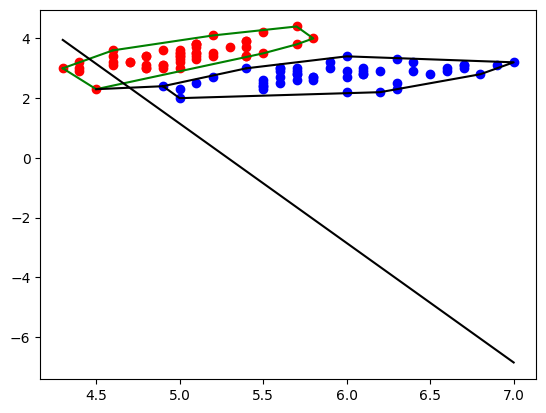

In [576]:
# Encontra o valor mínimo e o máximo de x no primeiro conjunto.
min_x1 = min(p[0] for p in pontos1)
max_x1 = max(p[0] for p in pontos1)

# Encontra o valor mínimo e o máximo de x no segundo conjunto.
min_x2 = min(p[0] for p in pontos2)
max_x2 = max(p[0] for p in pontos2)

# Retorna o valor mínimo e o máximo de x.
x_min = min(min_x1, min_x2)
x_max = max(max_x1, max_x2)


fig, ax = plt.subplots()


plt.scatter(np.array(pontos1)[:,0], np.array(pontos1)[:,1], color='red')
plt.scatter(np.array(pontos2)[:,0], np.array(pontos2)[:,1], color='blue')

# Plotando as envoltórias
plt.plot(np.array(envoltoria3)[:,0], np.array(envoltoria3)[:,1], color='green')
plt.plot(np.array(envoltoria4)[:,0], np.array(envoltoria4)[:,1], color='black')

# Adicionando segmento faltante que liga o último ponto da envoltória 1 com o primeiro
# ponto da envoltoria 1
plt.plot([envoltoria3[-1][0], envoltoria3[0][0]], [envoltoria3[-1][1], envoltoria3[0][1]], color='green')

# Adicionando segmento faltante que liga o último ponto da envoltória 2 com o primeiro
# ponto da envoltoria 2
plt.plot([envoltoria4[-1][0], envoltoria4[0][0]], [envoltoria4[-1][1], envoltoria4[0][1]], color='black')

# Plotando segmento de reta que liga os pontos mais próximos das duas envoltórias
p1 = envoltoria3[0]
p2 = envoltoria4[0]
for i in range(len(envoltoria3)):
    for j in range(len(envoltoria4)):
        if distance(envoltoria3[i], envoltoria4[j]) < distance(p1, p2):
            p1 = envoltoria3[i]
            p2 = envoltoria4[j]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black')


# Plotando a reta que passa por cima do segmento de reta que liga os pontos mais próximos das duas envoltórias
m, b = perpendicular(p1, p2)
x = np.linspace(x_min, x_max)
y = m * x + b
plt.plot(x, y, color='black')

# ax.set_aspect('equal')


plt.show()

#### Computando as métricas

Infelizmente não consegui progredir a partir deste ponto. Demorei muito para entender como seria a parte da criação do modelo (e ainda hoje não tenho certeza se entendi direito). O meu entendimento final, foi de que eu deveria utilizar a reta gerada, que separa os dois conjuntos de dados, para rotular os dados (os de teste e os de treino).

No caso, o que eu tentei fazer foi dividir a base de dados (Iris a princípio) em conjunto de teste e treino, utilizei um método que construi para encontrar um par de features linearmente separáveis. Depois fiz um pré-processamento nos dados para retirar as classes que não fossem as que eu queria tentar prever com o modelo, nos testes que eu fiz, deixei apenas as classes 0 e 1.

A grande problema veio na hora de testar o modelo com o cojunto de testes. Quando apliquei o modelo (equação da reta) para os pontos do conjutno de testes, obtive resultados inesperados (e alguns erros), com a dificuldade e entender essa parte ( e com o tempo que me restou ) não consegui resolver problema.

De todo modo, o presente notebook conta com o processo de criação do modelo até onde fui capaz de fazer, com o todo o processo de criação documentado a partir de comentários em código e "células markdown".